# solution for problem statement 1

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


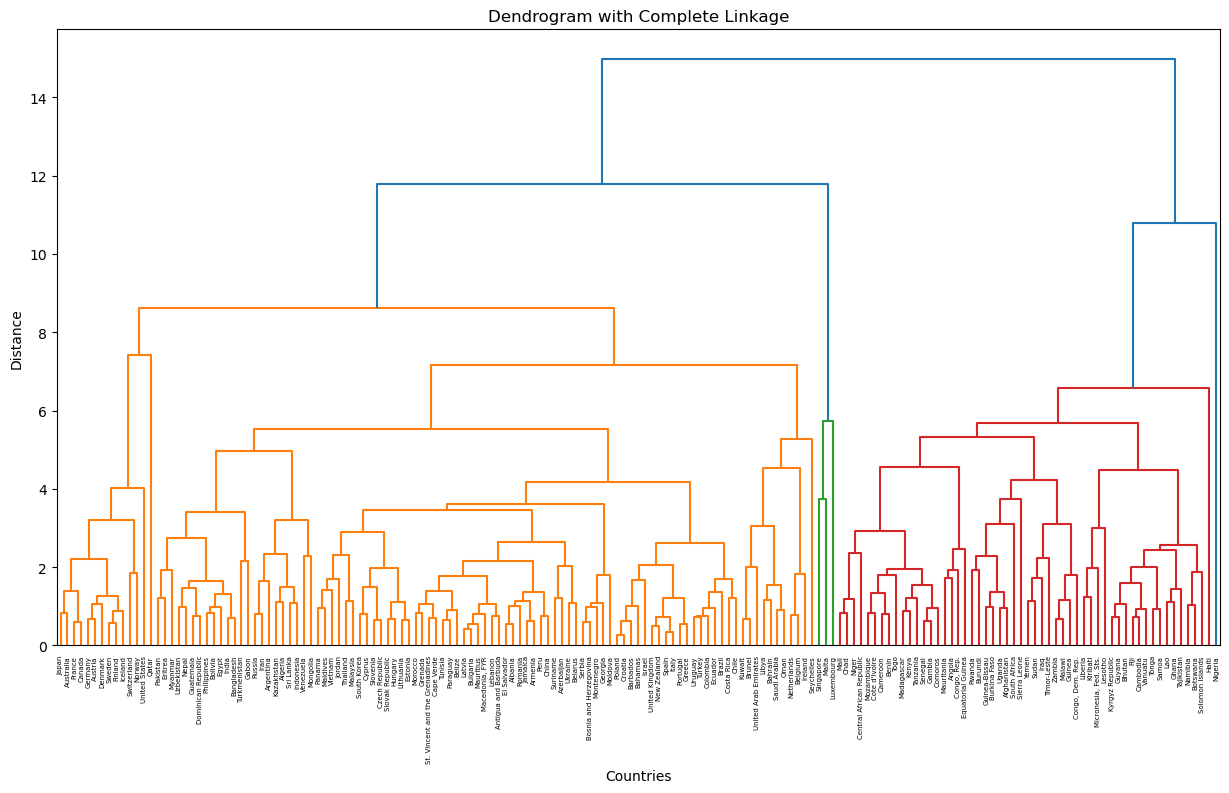

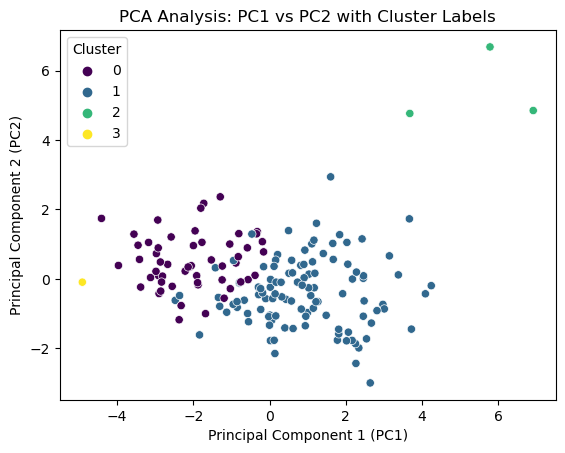

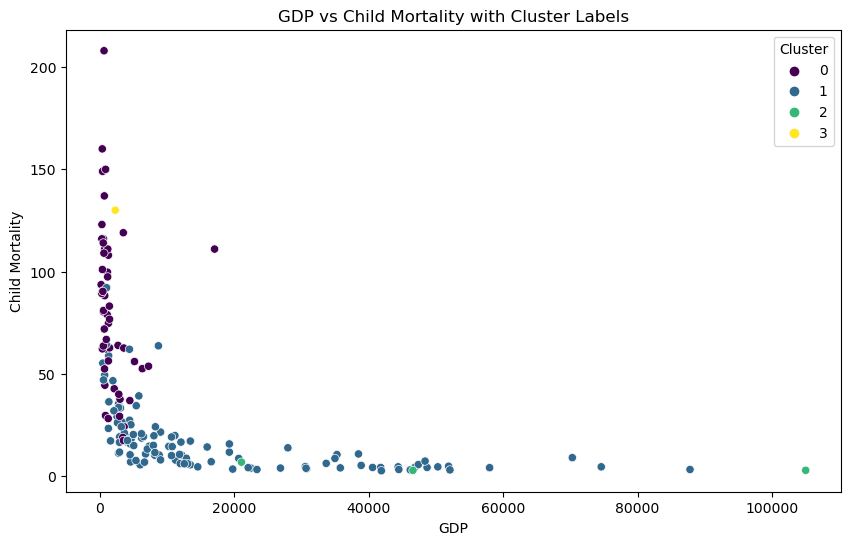

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.decomposition import PCA

# Task 1: Load the "Country-data.csv" dataset into a DataFrame
df = pd.read_csv("G:\\DATA SCIENCE ASSIGNMENTS AND PROJECTS\\Assignment 5 Datasets\\Country-data.csv")

# Display the first few rows of the dataset
print(df.head())

# Task 2: Create a separate DataFrame with only numeric data by removing the "country" column
numeric_df = df.drop(columns=["country"])
numeric_df

# Task 3: Scale the data using the Standard Scaler to create a scaled DataFrame
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Task 4: Plotting dendrograms with the complete linkage method
linkage_matrix = linkage(scaled_df, method='complete', metric='euclidean')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=df['country'].tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram with Complete Linkage')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

# Task 5: Creating cluster labels using cut_tree
num_clusters = 4  # You can choose the number of clusters based on the dendrogram
clusters = cut_tree(linkage_matrix, n_clusters=num_clusters).flatten()

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Task 6: Perform the 4-Component PCA on DataFrame
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Concatenate the cluster labels to the PCA DataFrame
final_df = pd.concat([pca_df, df[['country', 'Cluster']]], axis=1)

# Analyze how low GDP rate corresponds to child mortality rate around the world
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=final_df, palette='viridis', legend='full')
plt.title('PCA Analysis: PC1 vs PC2 with Cluster Labels')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

# Create a scatter plot with GDP vs Child Mortality for the original DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('GDP vs Child Mortality with Cluster Labels')
plt.xlabel('GDP')
plt.ylabel('Child Mortality')
plt.show()


# solution for problem statement 2

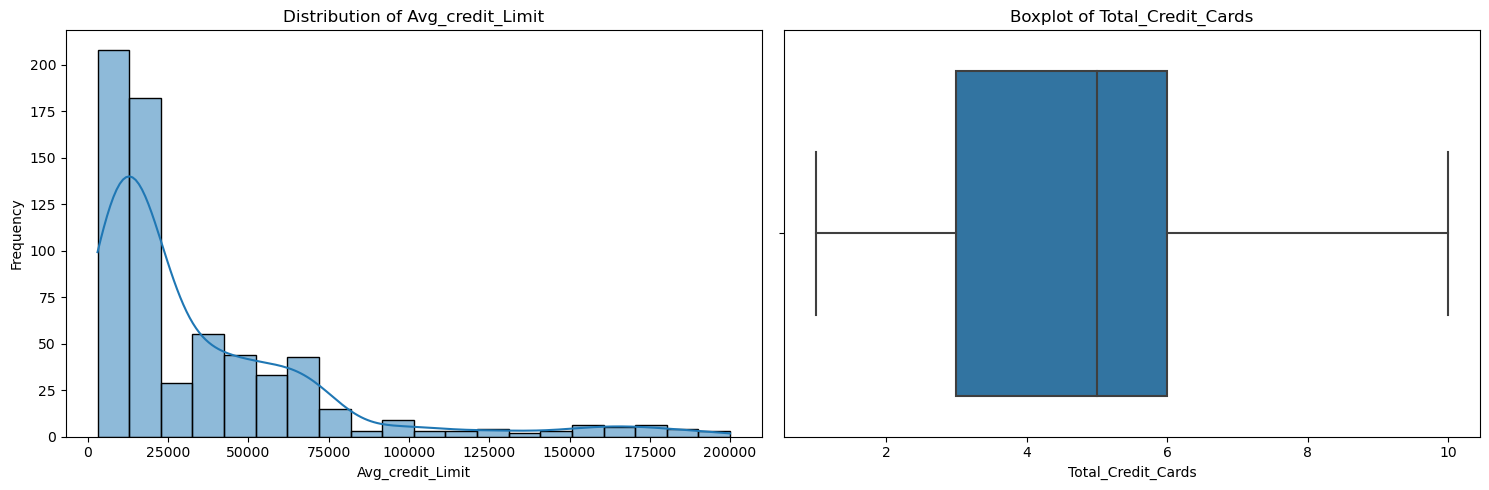

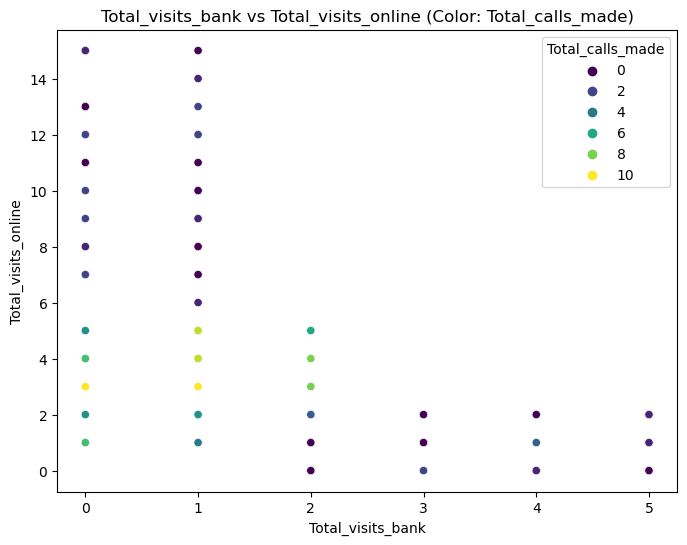

D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

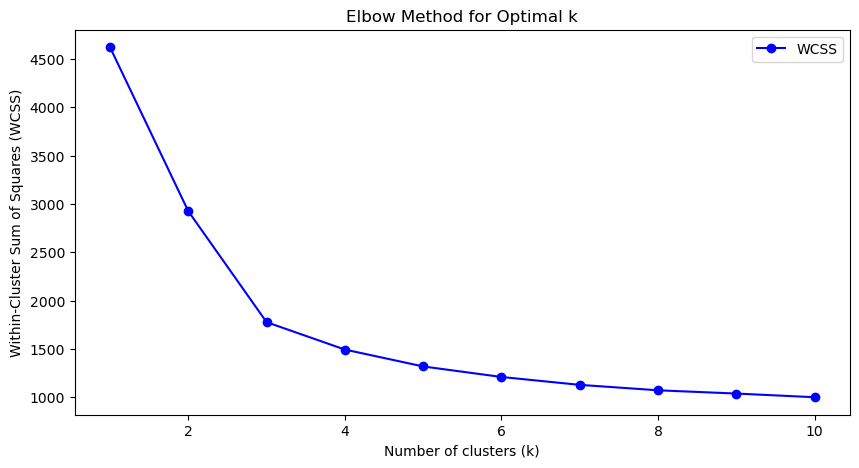

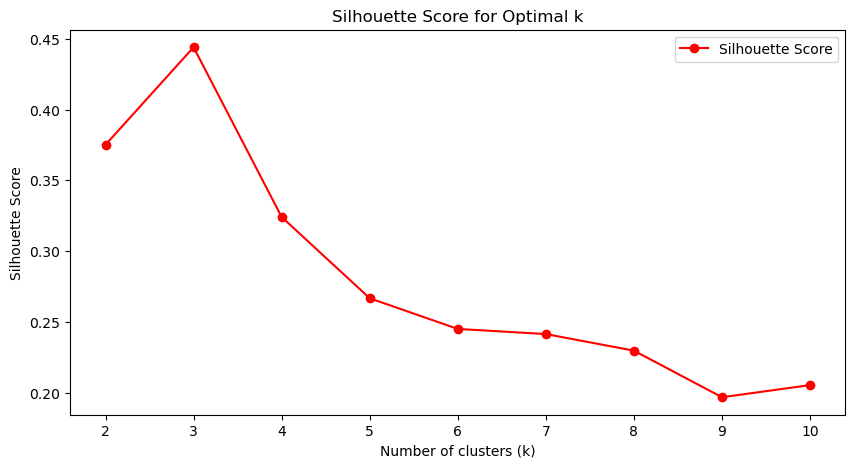

D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


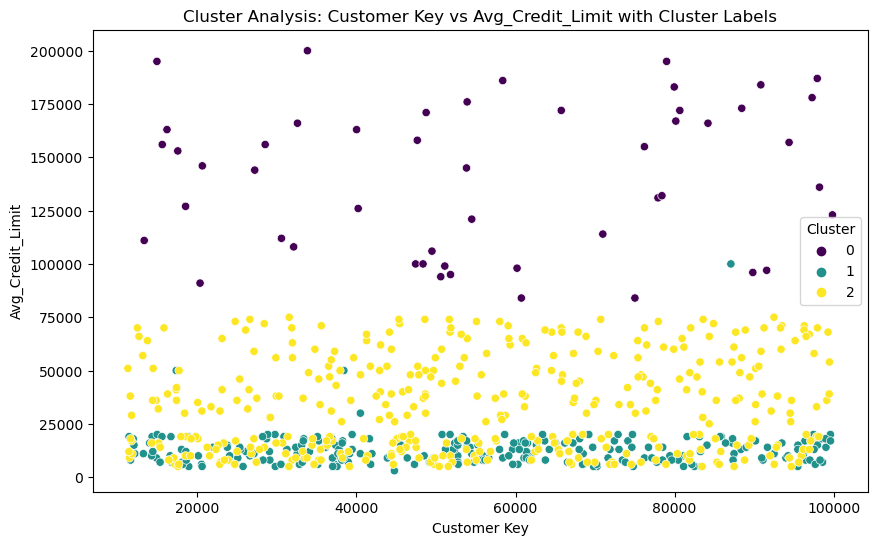

Coordinates of Centroids:
        Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0  611.280000  56708.760000     141040.000000            8.740000   
1  115.460177  55072.902655      12831.858407            2.433628   
2  420.500000  54977.705729      33507.812500            5.518229   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0           0.600000            10.900000          1.080000  
1           0.929204             3.535398          6.827434  
2           3.505208             0.979167          2.000000  
Silhouette Score for the Final Model: 0.44394092525170764


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Task 1: Load the Given CSV file into a DataFrame
df = pd.read_csv("G:\\DATA SCIENCE ASSIGNMENTS AND PROJECTS\\Assignment 5 Datasets\\Credit Card Customer Data.csv")
df

# Task 2: Find missing values and drop unnecessary columns
df.dropna(inplace=True)  # Drop rows with missing values

# Task 3: Univariate and Bivariate Analysis

# Univariate Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Avg_Credit_Limit'], bins=20, kde=True)
plt.title('Distribution of Avg_credit_Limit')
plt.xlabel('Avg_credit_Limit')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total_Credit_Cards'])
plt.title('Boxplot of Total_Credit_Cards')
plt.xlabel('Total_Credit_Cards')

plt.tight_layout()
plt.show()

# Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_visits_bank', y='Total_visits_online', data=df, hue='Total_calls_made', palette='viridis')
plt.title('Total_visits_bank vs Total_visits_online (Color: Total_calls_made)')
plt.xlabel('Total_visits_bank')
plt.ylabel('Total_visits_online')
plt.legend(title='Total_calls_made')

plt.show()

# Task 4: Standardize the whole dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
plt.show()

# Task 5: Find the within-cluster sum of square
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Task 6: Find silhouette score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Task 7: Use a line plot to find the best size for the cluster
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', label='WCSS')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='-', color='r', label='Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Task 8: Choose the best size for the cluster and build the final model
best_k = 3  # Chosen based on the plots (elbow or silhouette score)
final_model = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
final_model.fit(df_scaled)

# Task 8: Observe Cluster behavior with different columns

# Assign cluster labels to the original DataFrame
df['Cluster'] = final_model.labels_

# Visualizing cluster behavior with different columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer Key', y='Avg_Credit_Limit', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('Cluster Analysis: Customer Key vs Avg_Credit_Limit with Cluster Labels')
plt.xlabel('Customer Key')
plt.ylabel('Avg_Credit_Limit')
plt.show()

# Task 9: Observe Cluster behavior with different columns
df['Cluster'] = final_model.labels_

# Print Co-ordinates of all centroids
print("Coordinates of Centroids:")
centroids = scaler.inverse_transform(final_model.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=df.columns[:-1])
print(centroids_df)

# Print silhouette score for the final model
print("Silhouette Score for the Final Model:", silhouette_score(df_scaled, final_model.labels_))


# solution for problem statement 3

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


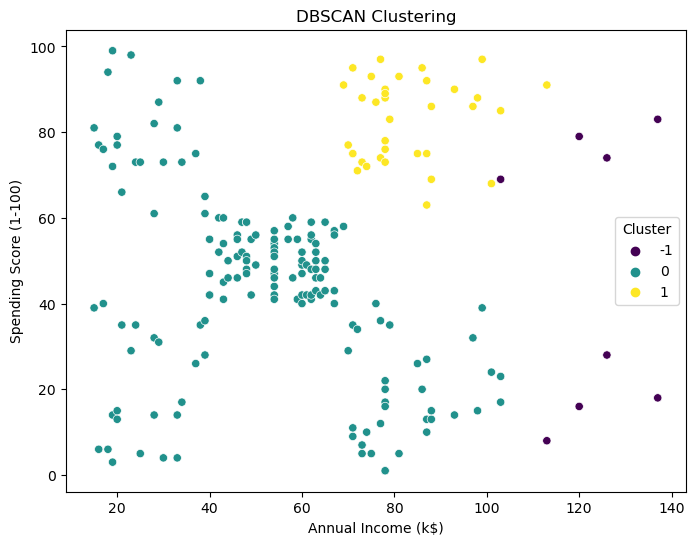

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Task 1: Load the "Mall_Customers.csv" dataset into a DataFrame
df = pd.read_csv("G:\\DATA SCIENCE ASSIGNMENTS AND PROJECTS\\Assignment 5 Datasets\\Mall_Customers.csv")
df

# Display the first few rows of the dataset
print(df.head())

# Task 2: Data Preprocessing
# Assuming there are no missing values in the dataset

# Task 3: Select features for clustering
# For example, let's consider 'Annual Income (k$)' and 'Spending Score (1-100)'
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Task 4: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Task 5: Perform DBSCAN clustering
# Choose epsilon and min_samples based on your dataset and requirements
epsilon = 0.5  # Example value, adjust as needed
min_samples = 5  # Example value, adjust as needed

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

# Task 6: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features[0], y=features[1], data=df, hue=clusters, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(title='Cluster')
plt.show()


# solution for problem statement 4

In [4]:
pip install mlxtend

In [8]:
# Task 1: Install mlxtend library if not installed
!pip install mlxtend


import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Task 2: Load the Groceries data.csv data into a DataFrame
df = pd.read_csv("G:\\DATA SCIENCE ASSIGNMENTS AND PROJECTS\\Assignment 5 Datasets\\Groceries data.csv")

df
# Task 3: Print customer data where the member number is 1001
member_1001_data = df[df['Member_number'] == 1001]
print("Customer data with Member number 1001:")
print(member_1001_data)

# Task 4: Create a new column as “item count”, and give the count as 1
df['item count'] = 1

# Task 5: Drop unnecessary columns
df.drop(columns=["month", "day", "year", "day_of_week"], inplace=True)

# Task 6: Create a new DataFrame grouped by member id and items they bought
grouped_data = df.groupby(['Member_number', 'itemDescription'])['item count'].sum().unstack().reset_index().fillna(0).set_index('Member_number')

# Task 7: Use the Apriori algorithm to generate frequent itemsets with minimum support of 7%
te = TransactionEncoder()
te_ary = te.fit(grouped_data.values).transform(grouped_data.values)
transformed_data = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(transformed_data, min_support=0.07, use_colnames=True)

# Task 8: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Task 9: Filter rules with lift >= 1 and confidence >= 0.5
filtered_rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

# Displaying the frequent itemsets and association rules
print("\nFrequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(filtered_rules)


     ---------------------------------------- 1.4/1.4 MB 959.6 kB/s eta 0:00:00
Customer data with Member number 1001:
       Member_number        Date     itemDescription  year  month  day  \
364             1001  2015-01-20         frankfurter  2015      1   20   
5695            1001  2015-02-05         frankfurter  2015      2    5   
6612            1001  2015-04-14                beef  2015      4   14   
9391            1001  2014-07-02             sausage  2014      7    2   
11046           1001  2014-12-12          whole milk  2014     12   12   
16513           1001  2015-01-20                soda  2015      1   20   
21844           1001  2015-02-05                curd  2015      2    5   
22761           1001  2015-04-14         white bread  2015      4   14   
25540           1001  2014-07-02          whole milk  2014      7    2   
27195           1001  2014-12-12                soda  2014     12   12   
32575           1001  2015-01-20  whipped/sour cream  2015      1  